# Data Profiling

# 0. Set up

In [19]:
import pandas as pd

# load data
df = pd.read_csv('input/dirty-loan-data.csv')
df.shape

(50100, 60)

In [20]:
df.head(5)

,Unnamed: 0,id_pk,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,next_pymnt_year,last_credit_pull_month,last_credit_pull_year,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,0,55978502,59640239,14400.0,14400.0,14400.0,36,5.61,50000.0,D,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,15278.0,15000.0
1,1,56141977,59803813,24550.0,24550.0,24550.0,36,2.29,50000.0,C,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,163368.0,41400.0
2,2,18935279,21167968,20000.0,20000.0,20000.0,60,6.29,50000.0,D,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,35408.0,28300.0
3,3,27580978,30084088,15000.0,15000.0,15000.0,36,-3.97,50000.0,A,...,NaN,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,146372.0,81600.0
4,4,4536779,5779043,16000.0,16000.0,15950.0,36,-1.10,50000.0,A,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,355820.0,45600.0


# 1. Create Data Profile

In [5]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title='Loan Dataset Profiling Report', minimal=True)
profile.to_file(output_file='output/profile/loan_data_profile.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# 1.1. Analyze Integrity


## Duplicates

To identify duplicates the first step is to remove the first column, which simply contains a row index. If we do not remove this column, the profiling will identify no rows as duplicates.

In [21]:
# drop first column
df = df.drop(columns='Unnamed: 0')

Looking at the output generated by the profiling, the first obvious problem is that the ID variables (**id_pk**, **id_member**) do not seem to be unique. This might be due to duplicated entries in the dataset. We can check this by filtering for all entries containing duplicated 'member_id' and order by 'member_id'.

In [25]:
# filter for all entries containing duplicated 'member_id' order by member_id
df[df.duplicated(subset='member_id', keep=False)].sort_values(by='member_id')

,id_pk,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_year,last_credit_pull_month,last_credit_pull_year,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
4,4536779,5779043,16000.0,16000.0,15950.0,36,-1.10,50000.00,A,A5,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,355820.0,45600.0
50004,4536779,5779043,16000.0,16000.0,15950.0,36,-1.10,508.06,A,A5,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,355820.0,45600.0
2,18935279,21167968,20000.0,20000.0,20000.0,60,6.29,50000.00,D,D2,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,35408.0,28300.0
50002,18935279,21167968,20000.0,20000.0,20000.0,60,6.29,489.45,D,D2,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,35408.0,28300.0
3,27580978,30084088,15000.0,15000.0,15000.0,36,-3.97,50000.00,A,A1,...,NaN,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,146372.0,81600.0
50003,27580978,30084088,15000.0,15000.0,15000.0,36,-3.97,456.54,A,A1,...,NaN,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,146372.0,81600.0
0,55978502,59640239,14400.0,14400.0,14400.0,36,5.61,50000.00,D,D1,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,15278.0,15000.0
50000,55978502,59640239,14400.0,14400.0,14400.0,36,5.61,503.50,D,D1,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,15278.0,15000.0
1,56141977,59803813,24550.0,24550.0,24550.0,36,2.29,50000.00,C,C1,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,163368.0,41400.0
50001,56141977,59803813,24550.0,24550.0,24550.0,36,2.29,818.82,C,C1,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,163368.0,41400.0


Additionally we can also check for rows where all variables are identical. This will return a boolean series where True indicates that the row is a duplicate of a previous row. We can then sum the number of True values to get the number of duplicates.

In [23]:
# show number of duplicates where all rows are equal
df.duplicated().sum()

95

Looking at the output we can see that we indeed have 95 duplicated cases (here the duplicates are identified by rows that contain identical values for all variables). However, we have 200 rows with duplicated member IDs (Here we identify duplicates based on members IDs only). This means that we have some cases where the member ID is duplicated, but the other variables are not identical. This is a problem, as it indicates that we have some inconsistencies in the data. Now let's start by removing the rows where all variables are identical.

In [26]:
# remove duplicates
df = df.drop_duplicates()
df.shape

(50005, 59)

Now we can re-check if we still have duplicates in the member_id variable. As we can see in the output below this is indeed the case. The mistake seems to lie in the variable **installment** where we have a value of 50000. This is likely a data error, as the variable **installment** should contain the monthly payment owed by the borrower if the loan originates. This means that the value 50000 is likely a mistake, as it is unlikely that a borrower would have to pay 50000 per month. We can check this by filtering for all entries containing duplicated 'member_id' and order by 'member_id'.

In [27]:
# filter for all entries containing duplicated 'member_id' order by member_id
df[df.duplicated(subset='member_id', keep=False)].sort_values(by='member_id')

,id_pk,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_year,last_credit_pull_month,last_credit_pull_year,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
4,4536779,5779043,16000.0,16000.0,15950.0,36,-1.10,50000.00,A,A5,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,355820.0,45600.0
50004,4536779,5779043,16000.0,16000.0,15950.0,36,-1.10,508.06,A,A5,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,355820.0,45600.0
2,18935279,21167968,20000.0,20000.0,20000.0,60,6.29,50000.00,D,D2,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,35408.0,28300.0
50002,18935279,21167968,20000.0,20000.0,20000.0,60,6.29,489.45,D,D2,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,35408.0,28300.0
3,27580978,30084088,15000.0,15000.0,15000.0,36,-3.97,50000.00,A,A1,...,NaN,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,146372.0,81600.0
50003,27580978,30084088,15000.0,15000.0,15000.0,36,-3.97,456.54,A,A1,...,NaN,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,146372.0,81600.0
0,55978502,59640239,14400.0,14400.0,14400.0,36,5.61,50000.00,D,D1,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,15278.0,15000.0
50000,55978502,59640239,14400.0,14400.0,14400.0,36,5.61,503.50,D,D1,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,15278.0,15000.0
1,56141977,59803813,24550.0,24550.0,24550.0,36,2.29,50000.00,C,C1,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,163368.0,41400.0
50001,56141977,59803813,24550.0,24550.0,24550.0,36,2.29,818.82,C,C1,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,163368.0,41400.0


In [10]:

# remove duplicates
df = df.drop_duplicates(subset='member_id', keep='first')

In [5]:
# check if all duplicates in member_id are removed
df[df.duplicated(subset='member_id', keep=False)].shape

(0, 59)

In [11]:
# check if all duplicates in id_pk are removed
df.shape

(50000, 59)

* There are duplicates that seem due to data errors in the **installment** variable (value(50000)).

## Inconsistencies

* Inconsistencies in Class Variables
* Date Variables
* Data Types

# 1.2. Analyze Completeness

# 1.3. Analyze Integrity

# 1.4. Analyze Accuracy

Another problem identified in the data are that at the moment dates are split into years and month. This becomes first visible when looking at the variables **issue_year** and **issue_month**. Since we only have observations for 2015, this means that the year variable by itself does not provide any useful information (no variation) in future analtical applications. 

<Axes: xlabel='issue_year', ylabel='count'>

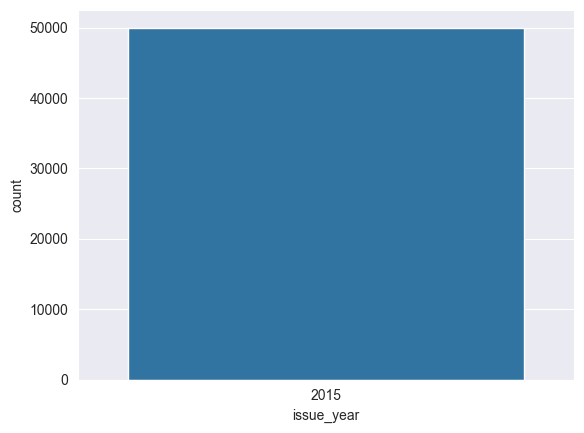

In [7]:
import seaborn as sns

# show distribution of issue_year
sns.countplot(data=df, x='issue_year')

Contrary to **issue_year* the variable **issue_month** does show some variation, as shown in the plot below.

<Axes: xlabel='issue_month', ylabel='count'>

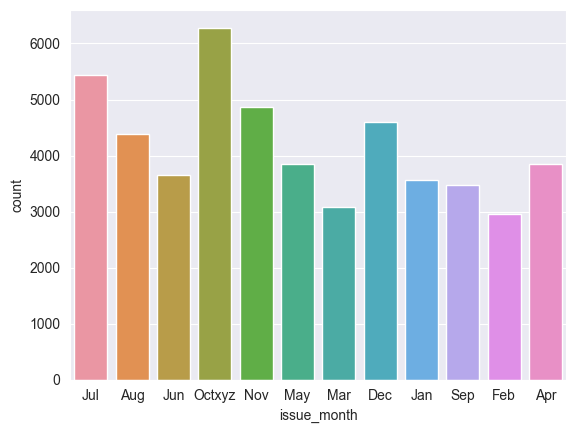

In [8]:
# show distribution of issue_month
sns.countplot(data=df, x='issue_month')

However, we also see that October was misspelled as *Octxyz*. We can fix this by replacing the misspelled value with the correct one.

In [9]:
# show unique values in issue_month
df['issue_month'].unique()

array(['Jul', 'Aug', 'Jun', 'Octxyz', 'Nov', 'May', 'Mar', 'Dec', 'Jan',
       'Sep', 'Feb', 'Apr'], dtype=object)

In [10]:
# replace misspelled value
df['issue_month'] = df['issue_month'].replace('Octxyz', 'Oct')
df['issue_month'].unique()

array(['Jul', 'Aug', 'Jun', 'Oct', 'Nov', 'May', 'Mar', 'Dec', 'Jan',
       'Sep', 'Feb', 'Apr'], dtype=object)

To remedy the fact that issue_year contains no variation, but we still would like to know the year, we can create a new variable that combines the year and month into a single variable. This will allow us to keep the information about the year, but also the month.

In [15]:
# create new variable issue_date with data type datetime
df['issue_date'] = pd.to_datetime(df['issue_year'].astype(str) + '-' + df['issue_month'], format='%Y-%b')

# drop issue_year and issue_month
df = df.drop(columns=['issue_year', 'issue_month'])

# show first 5 rows
df['issue_date'].head(5)

,id_pk,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_credit_pull_month,last_credit_pull_year,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,issue_date
0,55978502,59640239,14400.0,14400.0,14400.0,36,5.61,50000.0,D,D1,...,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,15278.0,15000.0,2015-07-01
1,56141977,59803813,24550.0,24550.0,24550.0,36,2.29,50000.0,C,C1,...,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,163368.0,41400.0,2015-08-01
2,18935279,21167968,20000.0,20000.0,20000.0,60,6.29,50000.0,D,D2,...,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,35408.0,28300.0,2015-06-01
3,27580978,30084088,15000.0,15000.0,15000.0,36,-3.97,50000.0,A,A1,...,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,146372.0,81600.0,2015-10-01
4,4536779,5779043,16000.0,16000.0,15950.0,36,-1.10,50000.0,A,A5,...,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,355820.0,45600.0,2015-08-01


TODO: Do the same for the other date variables in the dataset

# 1.5. Handle Textual Data

TODO:
* Remove variables containing only constant value (issue_year, issue_policy)
* de-duplicate IDs (member_id, id_pk)
* Handle Missing cases
*   Remove rows with only missing values
*   Remove columns with only missing values
*   Convert all Mssing values to NA
* Remove rolling ID
* Create timestamps for dates
* Avoid redundancies (Drop sub-categories)